In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm

In [2]:

def legendre_functs(n: int, func_dict: dict):
    # Returns the Legendrepolynomials up to order n
    funcs = []
    x = sm.symbols('x')
    if 0 not in func_dict.keys() : func_dict[0] = 1
    if 1 not in func_dict.keys() : func_dict[1] = x
    for i in range(n):
        if i not in func_dict.keys():
            alpha = (2*i - 1) / i
            beta = (i - 1) / i
            f = alpha * x * funcs[i-1] - beta * funcs[i-2]
            func_dict[i] = f
            funcs.append(f)
        else :
            funcs.append(func_dict[i])
    return funcs, func_dict

def legendre_zeros(func, xs: np.ndarray):
    # returns a dict of zeros of the legendre polynomials
    x = sm.symbols('x')
    zeros = []
    lam_f = sm.lambdify(x, func, modules='numpy')
    f_evals = lam_f(xs)
    for j in range(len(f_evals) - 1):
        if f_evals[j] * f_evals[j+1] < 0:
            zeros.append(xs[j])
    return zeros

def legendre_weights(func, zeros: np.ndarray):
    # Returns the weight for the legendre functions
    weights = []
    n = len(zeros)
    x = sm.symbols('x')
    for i in range(len(zeros)):
        der = sm.diff(func, x)
        der = der.subs(x, zeros[i])
        weights.append(2.0/((1 - zeros[i]**2) * der**2))
    return weights

def Gauss_Legendre_Quad(fs, weights: np.ndarray, zeros: np.ndarray) :
    sum = 0
    n = len(weights)
    y = sm.symbols('y')
    for i in range(n):
        sum += weights[i] * fs.subs(y, zeros[i])
    return sum

In [3]:
ys = np.linspace(-1, 1, 500)
xs = np.linspace(-1, 1, 100)
ns = range(4, 21, 2)
f_res = np.zeros((2*len(ns), 100))
y = sm.symbols('y')
x = sm.symbols('x')
func_dict = {}
funcs = [sm.exp(-(x - y)**2), x*sm.exp(-(x - y)**2)]
for i, func in enumerate(funcs):
    for j in range(len(ns)):
        leg_funcs , func_dict = legendre_functs(ns[j], func_dict)
        zeros = legendre_zeros(leg_funcs[-1], ys)
        weights = legendre_weights(leg_funcs[-1], zeros)
        res = Gauss_Legendre_Quad(func, weights, zeros)
        for k in range(len(xs)):
            f_res[i*len(ns) + j, k] = res.subs(x, xs[k])

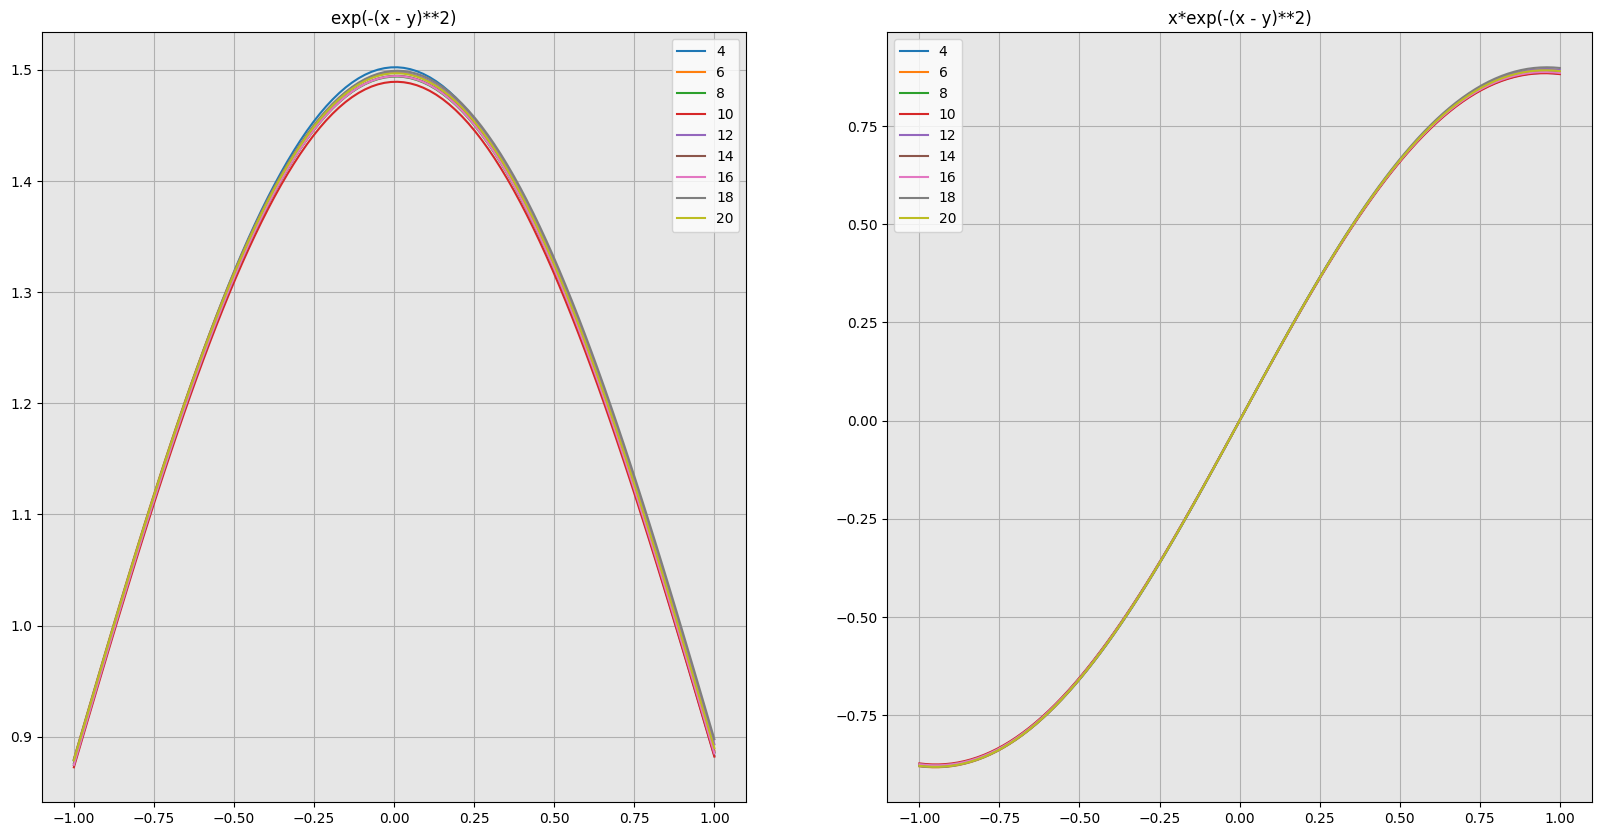

In [290]:
fig, axs = plt.subplots(1, 2, figsize = (20, 10))

for i in range(len(axs)):
    for j in range(len(ns)):
        axs[i].plot(xs, f_res[j + i*len(ns)], label = f"{ns[j]}")
        axs[i].legend()
    axs[i].grid(True)
    axs[i].set_facecolor("#E6E6E6")
    axs[i].set_title(f"{funcs[i]}")